In [ ]:
#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificacion ----

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#----  Curva ROC y PR ----

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

#---- Importaciones para el modelo de Decision Tree classification ----

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree # Árboles de decisión

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

Eliminacion de columas
- **Unnamed 0:** no tendra un uso dentro de nuestro analisis y para las siguiente etapas.
- **AbnormalMatch:** esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas.
- **FirstKillTime:** FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas.
- **TimeAlive y TravelledDistance**: Estas variables no podran ser usadas debido al formato que presenta para el modelo.


In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**

trataremos de trasformar y arreglar variables que no son numericos, cambiar formatos  para poder utilizar despues  para preparar el modelado utilizando scaler

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding
El label encoding nos ayudara a transformar los
datos categóricos **Team** y **Map** en un formato numérico como beneficio a posibles modelos de machine learning.

In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


- Se realiza una transformacion en los datos que contenga valores de tipo **TRUE** o **FALSE** a valores **numericos** con el proposito de realizar modelos que requieran de estos tipos de datos. Ademas, con esto, ayudara o benecifiar el procesamiento de los datos optimizando la velocidad y eficientiza.

In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **3. Modelo Decision Tree classification**

### Ingreso de las caracteristicas

In [ ]:
X = df_backup[['TeamStartingEquipmentValue','MatchKills','Map']]
#X = df_backup[['Team', 'Map',  'RoundWinner']]
y = df_backup['MatchWinner']

### Separación de los datos: entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creacion del Modelo DecisionTreeClassifier

In [ ]:
model = sklearn.tree.DecisionTreeClassifier( # Instanciamos nuestro árbol de decisión.
    max_depth=10, # Forzamos que nuestro árbol sólo tenga 10 niveles de profundidad.
    criterion = "entropy"
    )


# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

### Realizando predicciones

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
predictions = model.predict(X)
print(predictions[0:10])

[1 1 1 1 1 0 0 0 1 0]


### Evaluación del modelo

In [ ]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      8311
           1       0.61      0.62      0.61      7411

    accuracy                           0.63     15722
   macro avg       0.63      0.63      0.63     15722
weighted avg       0.63      0.63      0.63     15722


Confusion Matrix:
[[5330 2981]
 [2821 4590]]

Accuracy Score:
0.6309629818089302


### Calculando Sensitivity Y Specificity

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.6193
Specificity: 0.6413


### Visualizando el arbol de decisión

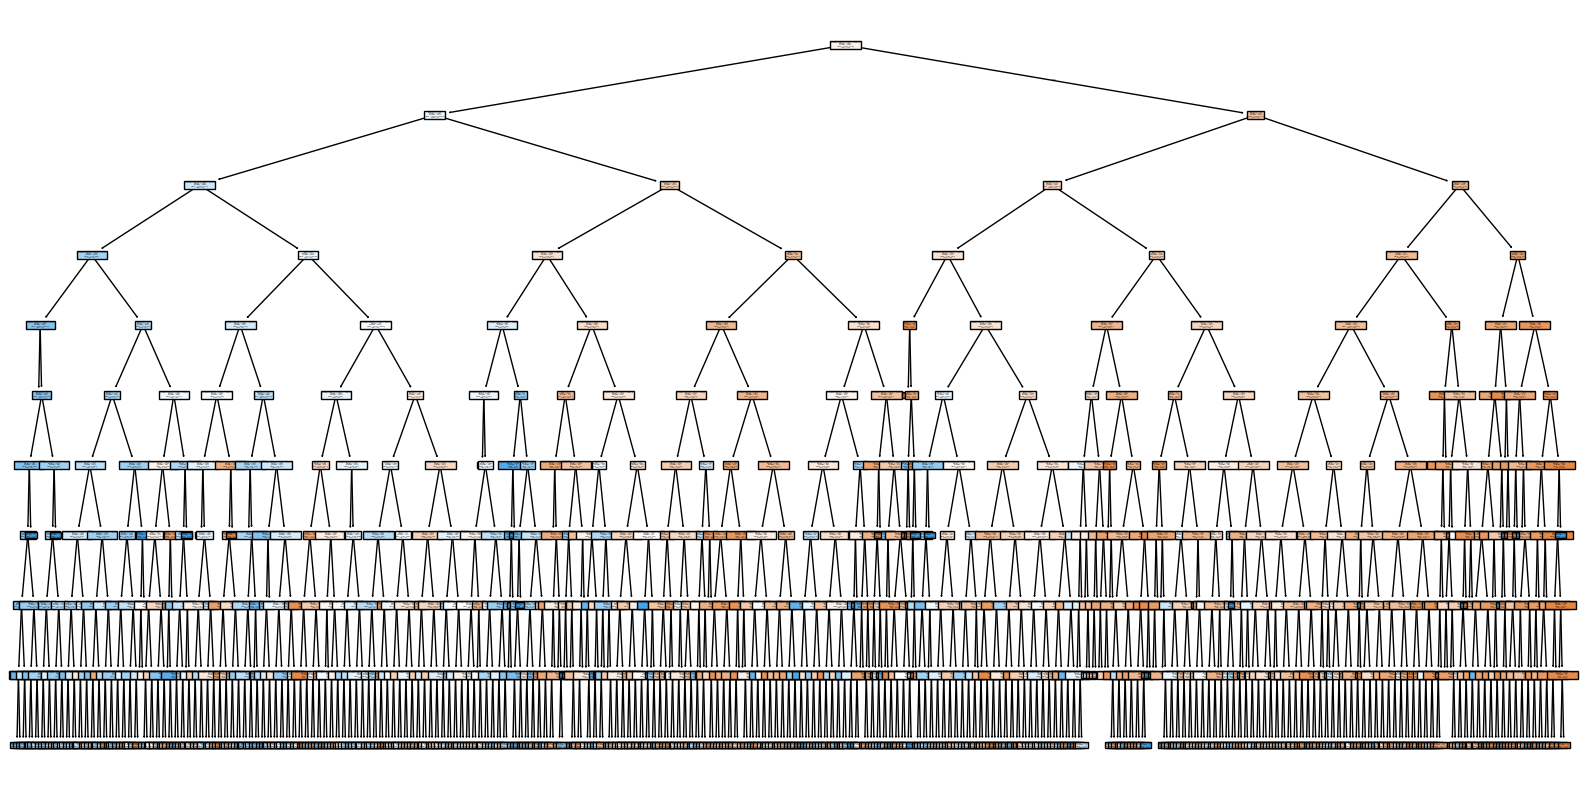

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True)
plt.show()

### Curva ROC

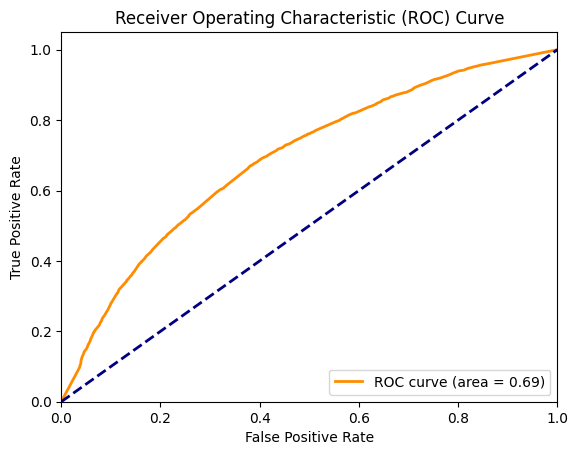


AUC: 0.6898794909880811


In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc}")


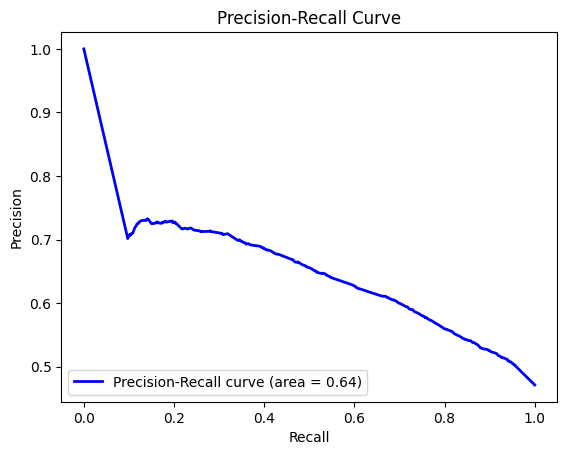


Average Precision (AP): 0.6374997897072391


In [ ]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate Average Precision
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"\nAverage Precision (AP): {average_precision}")


# **Uso  GridsearchCV**

In [ ]:
# Define el rango de hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajusta el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Imprime la mejor puntuación de precisión encontrada
print("\nMejor puntuación de precisión:")
print(grid_search.best_score_)

# Puedes obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Evalúa el mejor modelo en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
print("\nEvaluación del mejor modelo en el conjunto de prueba:")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))


Mejores parámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mejor puntuación de precisión:
0.6271307761520881

Evaluación del mejor modelo en el conjunto de prueba:
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      8311
           1       0.62      0.56      0.59      7411

    accuracy                           0.63     15722
   macro avg       0.63      0.63      0.63     15722
weighted avg       0.63      0.63      0.63     15722


Confusion Matrix:
[[5789 2522]
 [3254 4157]]

Accuracy Score:
0.6326167154306068


###Sensitivity y Specificity del mejor modelo con GridSearchCV

In [ ]:
cm_best = confusion_matrix(y_test, y_pred_best)

TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]
TP_best = cm_best[1, 1]

sensitivity_best = TP_best / (TP_best + FN_best)
specificity_best = TN_best / (TN_best + FP_best)

print(f"\nSensitivity (Best Model): {sensitivity_best:.4f}")
print(f"Specificity (Best Model): {specificity_best:.4f}")



Sensitivity (Best Model): 0.5609
Specificity (Best Model): 0.6965


### Grafica del mejor árbol de decisión

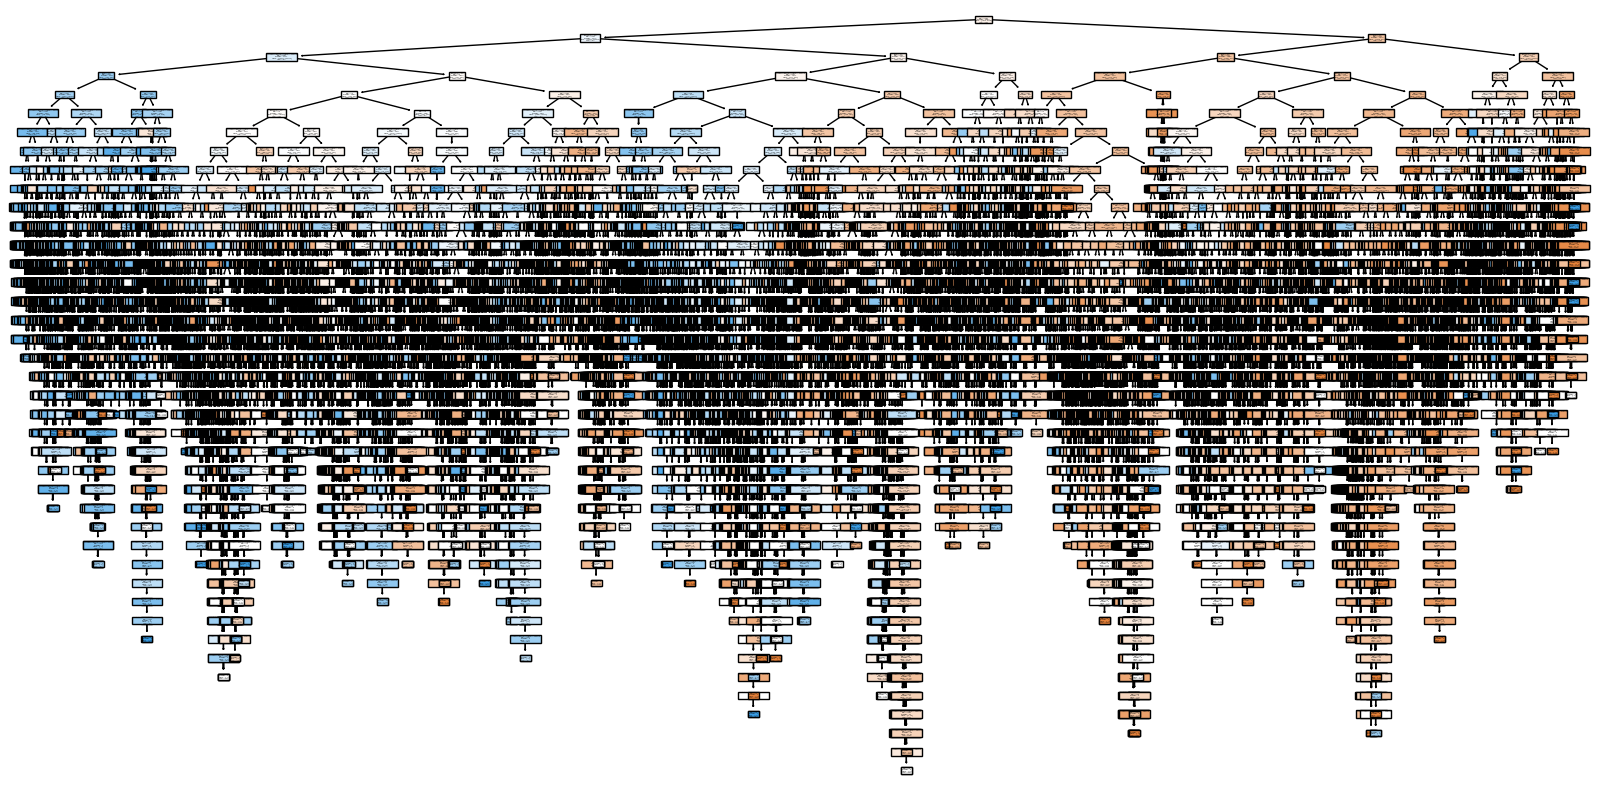

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, feature_names=X.columns, class_names=['Loss', 'Win'], filled=True)
plt.show()

### Predicciones con el mejor modelo de GridsearchCV

In [ ]:
predictions_best = best_model.predict(X)

# Imprime las primeras 10 predicciones del mejor modelo
print("Predicciones con el mejor modelo (primeros 10):")
print(predictions_best[0:10])

Predicciones con el mejor modelo (primeros 10):
[1 1 1 1 1 0 0 0 0 0]


### Curva ROC y PR

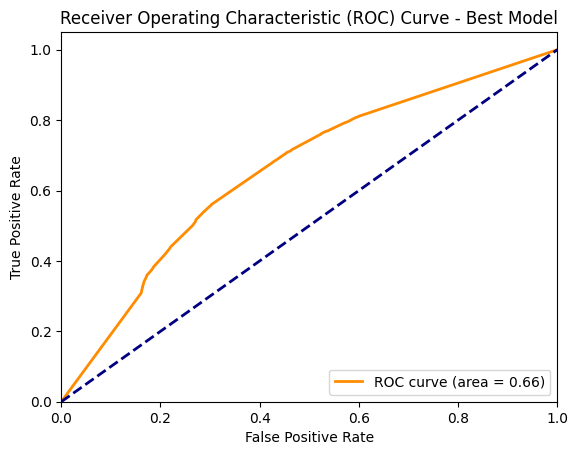


AUC for Best Model: 0.6581124446305195


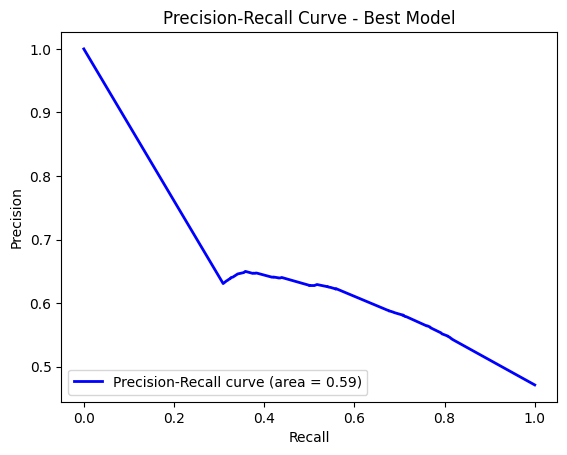


Average Precision (AP) for Best Model: 0.5885298942604944


In [ ]:

y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC para el mejor modelo
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

# Graficar la curva ROC para el mejor modelo
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Best Model: {roc_auc_best}")

# Calcular la curva Precision-Recall para el mejor modelo
precision_best, recall_best, _ = precision_recall_curve(y_test, y_pred_proba_best)
average_precision_best = average_precision_score(y_test, y_pred_proba_best)

# Graficar la curva Precision-Recall para el mejor modelo
plt.figure()
plt.plot(recall_best, precision_best, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_best)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best Model')
plt.legend(loc="lower left")
plt.show()

print(f"\nAverage Precision (AP) for Best Model: {average_precision_best}")


# **Conclusión**
- El modelo Decision Tree Classification obtuvo un rendimiento aceptable. Para la clase 0 (perder), alcanzó una precisión de 0.65, un recall de 0.64 y un f1-score de 0.65, mostrando un buen equilibrio en la identificación de esta clase. Por otro lado, para la clase 1 (ganar), el modelo tuvo una precisión de 0.61, un recall de 0.62 y un f1-score de 0.61, lo que indica una menor capacidad para reconocer correctamente las partidas ganadas.

- Al aplicar GridSearchCV para mejorarr los hiperparámetros, se obtuvo una mejora en la clase 0, alcanzando un recall de 0.70, aunque una disminución en la precisión (0.64), resultando en un f1-score de 0.67. Sin embargo, en la clase 1, el modelo ajustado tuvo mayores dificultades para identificar esta clase, con una precisión de 0.62, un recall de 0.56 y un f1-score de 0.59.